In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
pd.options.display.max_columns = None

%matplotlib inline

pump = pd.read_csv('pump.csv')
labels = pd.read_csv('pump_labels.csv')
pump['status'] = labels.status_group
pump['date_recorded'] = pd.to_datetime(pump['date_recorded']) # converting date to datetime object

In [2]:
pump.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,Lake Nyasa,Mnyusi B,Iringa,11,5,Ludewa,Mundindi,109,True,GeoData Consultants Ltd,VWC,Roman,False,1999,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,Lake Victoria,Nyamara,Mara,20,2,Serengeti,Natta,280,NaN,GeoData Consultants Ltd,Other,NaN,True,2010,gravity,gravity,gravity,wug,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,Pangani,Majengo,Manyara,21,4,Simanjiro,Ngorika,250,True,GeoData Consultants Ltd,VWC,Nyumba ya mungu pipe scheme,True,2009,gravity,gravity,gravity,vwc,user-group,pay per bucket,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,Mahakamani,Mtwara,90,63,Nanyumbu,Nanyumbu,58,True,GeoData Consultants Ltd,VWC,NaN,True,1986,submersible,submersible,submersible,vwc,user-group,never pay,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,Lake Victoria,Kyanyamisa,Kagera,18,1,Karagwe,Nyakasimbi,0,True,GeoData Consultants Ltd,NaN,NaN,True,0,gravity,gravity,gravity,other,other,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional


In [3]:
pump.columns

Index(['id', 'amount_tsh', 'date_recorded', 'funder', 'gps_height',
       'installer', 'longitude', 'latitude', 'wpt_name', 'num_private',
       'basin', 'subvillage', 'region', 'region_code', 'district_code', 'lga',
       'ward', 'population', 'public_meeting', 'recorded_by',
       'scheme_management', 'scheme_name', 'permit', 'construction_year',
       'extraction_type', 'extraction_type_group', 'extraction_type_class',
       'management', 'management_group', 'payment', 'payment_type',
       'water_quality', 'quality_group', 'quantity', 'quantity_group',
       'source', 'source_type', 'source_class', 'waterpoint_type',
       'waterpoint_type_group', 'status'],
      dtype='object')

In [4]:
pump.isna().sum()

id                           0
amount_tsh                   0
date_recorded                0
funder                    3635
gps_height                   0
installer                 3655
longitude                    0
latitude                     0
wpt_name                     0
num_private                  0
basin                        0
subvillage                 371
region                       0
region_code                  0
district_code                0
lga                          0
ward                         0
population                   0
public_meeting            3334
recorded_by                  0
scheme_management         3877
scheme_name              28166
permit                    3056
construction_year            0
extraction_type              0
extraction_type_group        0
extraction_type_class        0
management                   0
management_group             0
payment                      0
payment_type                 0
water_quality                0
quality_

scheme_name will be dropped. All of the other missing data (at least with NaN values) are categorical. We will label these values as missing.

In [5]:
pump = pump.fillna('missing')
pump.nunique()

id                       59400
amount_tsh                  98
date_recorded              356
funder                    1898
gps_height                2428
installer                 2146
longitude                57516
latitude                 57517
wpt_name                 37400
num_private                 65
basin                        9
subvillage               19288
region                      21
region_code                 27
district_code               20
lga                        125
ward                      2092
population                1049
public_meeting               3
recorded_by                  1
scheme_management           13
scheme_name               2697
permit                       3
construction_year           55
extraction_type             18
extraction_type_group       13
extraction_type_class        7
management                  12
management_group             5
payment                      7
payment_type                 7
water_quality                8
quality_

In [6]:
object_cols = []
for col in pump.columns:
    if pump[col].dtype == 'object':
        object_cols.append(col)
for col in object_cols:
    print('\n')
    print(pump[col].value_counts())



Government Of Tanzania    9084
missing                   3635
Danida                    3114
Hesawa                    2202
Rwssp                     1374
                          ... 
Rdws                         1
Tanload                      1
Isnashia And                 1
Kkkt Canal                   1
Village Communi              1
Name: funder, Length: 1898, dtype: int64


DWE                         17402
missing                      3655
Government                   1825
RWE                          1206
Commu                        1060
                            ...  
Maswi Company                   1
Makonde water Population        1
Coun                            1
Kiwanda cha Ngozi               1
Anglican Uganda                 1
Name: installer, Length: 2146, dtype: int64


none               3563
Shuleni            1748
Zahanati            830
Msikitini           535
Kanisani            323
                   ... 
Kwajumana             1
Kwa Mama Mganga       1
Om

Looking at some of the categories with many unique values, many have only 1 count. So we can probably throw a lot of the unique categories in an 'other' category in order to try and get some predictive signal and simplify our data.

## Funder

In [7]:
funder_series = pump['funder'].value_counts()
funder_series.head(50)

Government Of Tanzania            9084
missing                           3635
Danida                            3114
Hesawa                            2202
Rwssp                             1374
World Bank                        1349
Kkkt                              1287
World Vision                      1246
Unicef                            1057
Tasaf                              877
District Council                   843
Dhv                                829
Private Individual                 826
Dwsp                               811
0                                  777
Norad                              765
Germany Republi                    610
Tcrs                               602
Ministry Of Water                  590
Water                              583
Dwe                                484
Netherlands                        470
Hifab                              450
Adb                                448
Lga                                442
Amref                    

Just to have an somewhat arbitrary cutoff point, we'll take a look at all of the different funders with counts >= 500.

In [8]:
pump.loc[pump['funder'] == 'Government of Tanzania'].head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status


In [9]:
funder_cols = list(funder_series.loc[:'Water'].index)
funder_cols.pop(0)
funder_df = pump.loc[pump['funder']== 'Government Of Tanzania']
for col in funder_cols:
    temp_df = pump.loc[pump['funder'] == col]
    funder_df = pd.concat([funder_df, temp_df])

In [10]:
funder_df.head() #for sanity check

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status
25,22308,0.0,2013-02-25,Government Of Tanzania,1273,DWE,37.422751,-3.317536,Kwa Tukai,0,Pangani,Kitereni,Kilimanjaro,3,4,Moshi Rural,Kimochi,140,True,GeoData Consultants Ltd,VWC,Komaka mandaka,True,1974,gravity,gravity,gravity,vwc,user-group,unknown,unknown,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional needs repair
28,19685,0.0,2013-03-05,Government Of Tanzania,1443,District council,37.611126,-3.263526,Kwa Kibakaya,0,Pangani,Kiyao,Kilimanjaro,3,1,Rombo,Mengwe Manda,1,True,GeoData Consultants Ltd,Company,Kitukuni water supply,True,2000,gravity,gravity,gravity,company,commercial,pay monthly,monthly,soft,good,insufficient,insufficient,spring,spring,groundwater,communal standpipe,communal standpipe,non functional
32,57238,0.0,2013-03-19,Government Of Tanzania,1481,DWE,37.492334,-3.290627,Kwa Philip Lyimo,0,Pangani,Mosheni,Kilimanjaro,3,4,Moshi Rural,Kilema Kati,180,False,GeoData Consultants Ltd,Other,Mae pipeline,True,1972,gravity,gravity,gravity,other,other,never pay,never pay,soft,good,insufficient,insufficient,river,river/lake,surface,other,other,functional needs repair
39,25,0.0,2013-02-11,Government Of Tanzania,1348,DWE,30.613305,-3.894561,Mkuyuni,0,Lake Tanganyika,Nyabwai B,Kigoma,16,1,Kibondo,Rugongowe,230,True,GeoData Consultants Ltd,VWC,missing,False,2002,nira/tanira,nira/tanira,handpump,vwc,user-group,unknown,unknown,soft,good,seasonal,seasonal,shallow well,shallow well,groundwater,hand pump,hand pump,non functional
41,12796,500.0,2011-03-12,Government Of Tanzania,2469,Commu,33.927902,-9.204649,none,0,Lake Nyasa,Kilunduwe,Iringa,11,3,Makete,Ipelele,0,True,GeoData Consultants Ltd,VWC,Misiwa,False,1986,gravity,gravity,gravity,vwc,user-group,pay when scheme fails,on failure,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional


In [11]:
funder_df.tail() #for sanity check

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status
59107,59453,0.0,2011-03-18,Water,0,Gover,36.402268,-6.657112,Masiai,0,Wami / Ruvu,Masena A,Dodoma,1,1,Mpwapwa,Kibakwe,0,True,GeoData Consultants Ltd,VWC,Iyen,True,0,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional needs repair
59168,40082,0.0,2011-04-10,Water,0,DWE,35.803671,-4.543196,Kwa Abushir,0,Internal,Maloya,Dodoma,1,1,Kondoa,Masange,0,True,GeoData Consultants Ltd,VWC,Kand,False,0,gravity,gravity,gravity,vwc,user-group,never pay,never pay,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,non functional
59206,52674,0.0,2011-04-17,Water,0,DWE,36.052993,-4.878181,Kwa Namka,0,Internal,Kati,Dodoma,1,1,Kondoa,Busi,0,True,GeoData Consultants Ltd,VWC,Mach,False,0,gravity,gravity,gravity,vwc,user-group,never pay,never pay,soft,good,insufficient,insufficient,spring,spring,groundwater,communal standpipe multiple,communal standpipe,functional
59279,11835,0.0,2011-04-17,Water,0,DWE,35.916059,-4.709524,Kwa Mzungu,0,Internal,Mkekena,Dodoma,1,1,Kondoa,Pahi,0,True,GeoData Consultants Ltd,VWC,Pahi,False,0,gravity,gravity,gravity,vwc,user-group,never pay,never pay,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional needs repair
59312,15864,0.0,2011-03-18,Water,0,Gover,36.378421,-6.589608,Ng'Ambo,0,Wami / Ruvu,Mjegwa,Dodoma,1,1,Mpwapwa,Kibakwe,0,True,GeoData Consultants Ltd,VWC,Luko,True,0,gravity,gravity,gravity,vwc,user-group,never pay,never pay,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,non functional


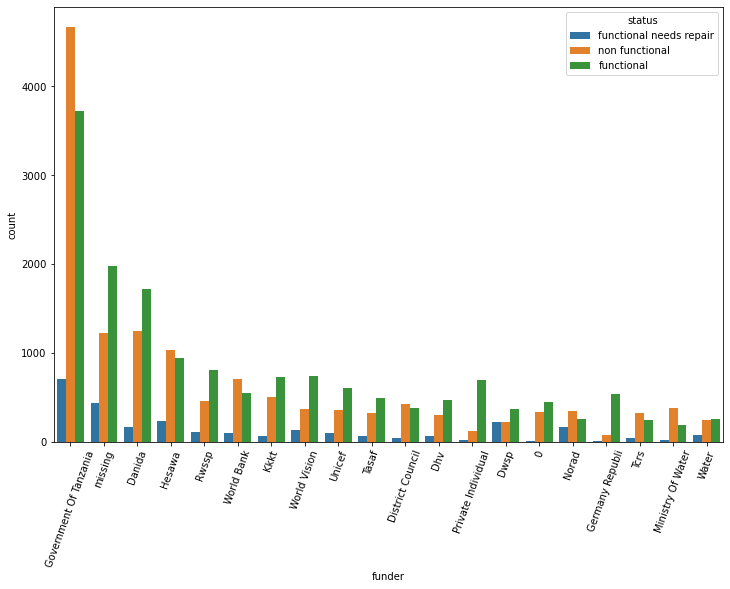

In [12]:
fig = plt.figure(figsize = (12,8))
ax = sns.countplot(data = funder_df, x = 'funder', hue = 'status')
ax.set_xticklabels(ax.get_xticklabels(),rotation=70)
plt.show()

Now funder looks to be very useful. Let's try including some more categories.

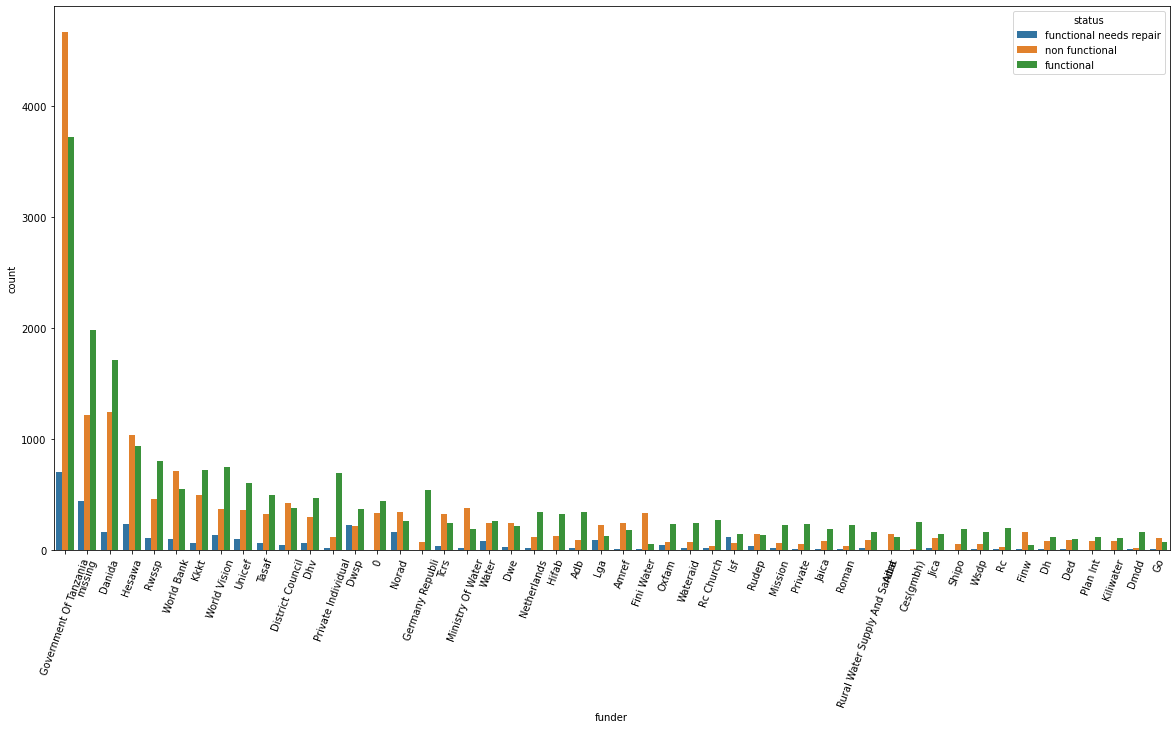

In [13]:
funder_cols = list(funder_series.iloc[:50].index) # try the 1st 50 categories
funder_cols.pop(0)
funder_df = pump.loc[pump['funder']== 'Government Of Tanzania']
for col in funder_cols:
    temp_df = pump.loc[pump['funder'] == col]
    funder_df = pd.concat([funder_df, temp_df])
    
fig = plt.figure(figsize = (20,10))
ax = sns.countplot(data = funder_df, x = 'funder', hue = 'status')
ax.set_xticklabels(ax.get_xticklabels(),rotation=70)
plt.show()

Once again, funder appears to have quite a bit of power in predicting pump status. We will decide on our cutoff points and what to do with smaller categories later.

## Installer

In [14]:
pump['installer'].value_counts()

DWE                         17402
missing                      3655
Government                   1825
RWE                          1206
Commu                        1060
                            ...  
Maswi Company                   1
Makonde water Population        1
Coun                            1
Kiwanda cha Ngozi               1
Anglican Uganda                 1
Name: installer, Length: 2146, dtype: int64

Like with funder installer has a lot of unique values. We'll just look at the first few.

In [15]:
installer_series = pump['installer'].value_counts()
installer_series.head(50)

DWE                           17402
missing                        3655
Government                     1825
RWE                            1206
Commu                          1060
DANIDA                         1050
KKKT                            898
Hesawa                          840
0                               777
TCRS                            707
Central government              622
CES                             610
Community                       553
DANID                           552
District Council                551
HESAWA                          539
World vision                    408
LGA                             408
WEDECO                          397
TASAF                           396
District council                392
Gover                           383
AMREF                           329
TWESA                           316
WU                              301
Dmdd                            287
ACRA                            278
World Vision                

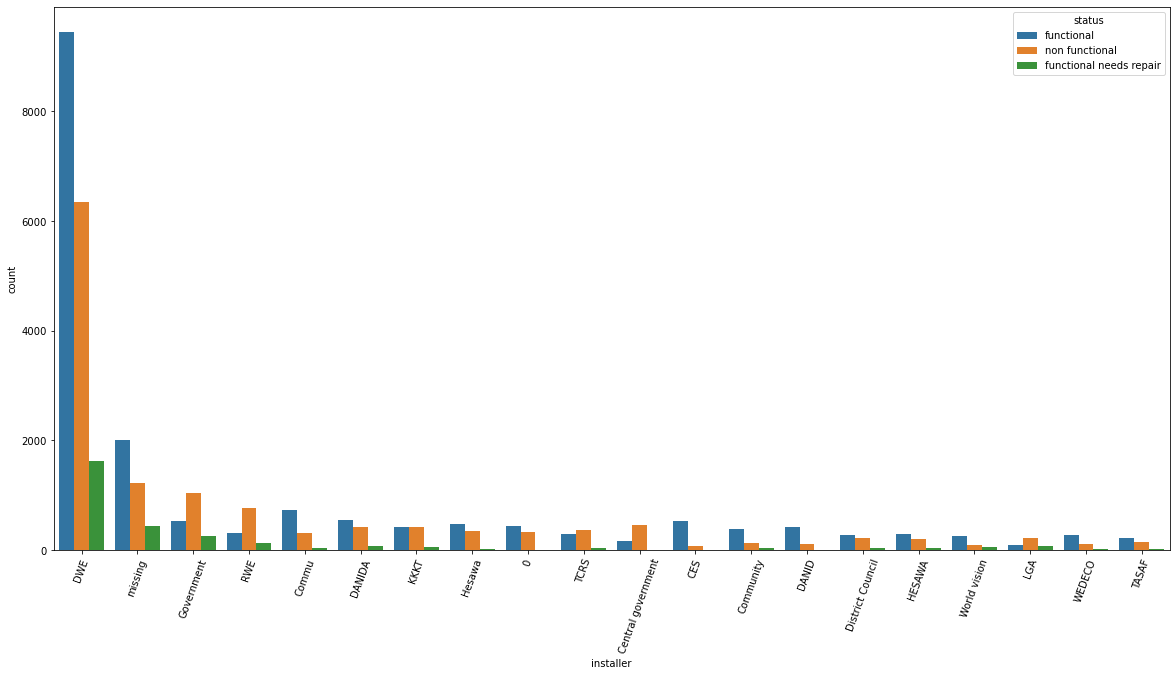

In [16]:
installer_cols = list(installer_series.iloc[:20].index) # try the first 20 categories
installer_cols.pop(0)
installer_df = pump.loc[pump['installer']== 'DWE']
for col in installer_cols:
    temp_df = pump.loc[pump['installer'] == col]
    installer_df = pd.concat([installer_df, temp_df])
    
fig = plt.figure(figsize = (20,10))
ax = sns.countplot(data = installer_df, x = 'installer', hue = 'status')
ax.set_xticklabels(ax.get_xticklabels(),rotation=70)
plt.show()

Doesn't appear to be as useful as funder but still has a lot of predictive signal. It looks like the govt and RWE installed pumps are less likely to be functional.

## lga

In [17]:
lga_series = pump['lga'].value_counts()
lga_series.head(60)

Njombe              2503
Arusha Rural        1252
Moshi Rural         1251
Bariadi             1177
Rungwe              1106
Kilosa              1094
Kasulu              1047
Mbozi               1034
Meru                1009
Bagamoyo             997
Singida Rural        995
Kilombero            959
Same                 877
Kibondo              874
Kyela                859
Kahama               836
Kigoma Rural         824
Magu                 824
Maswa                809
Karagwe              771
Mbinga               750
Iringa Rural         728
Serengeti            716
Namtumbo             694
Lushoto              694
Songea Rural         693
Mpanda               679
Mvomero              671
Ngara                669
Ulanga               665
Makete               630
Kwimba               627
Mbarali              626
Hai                  625
Rombo                594
Shinyanga Rural      588
Nzega                575
Ludewa               564
Mkuranga             560
Iramba               544


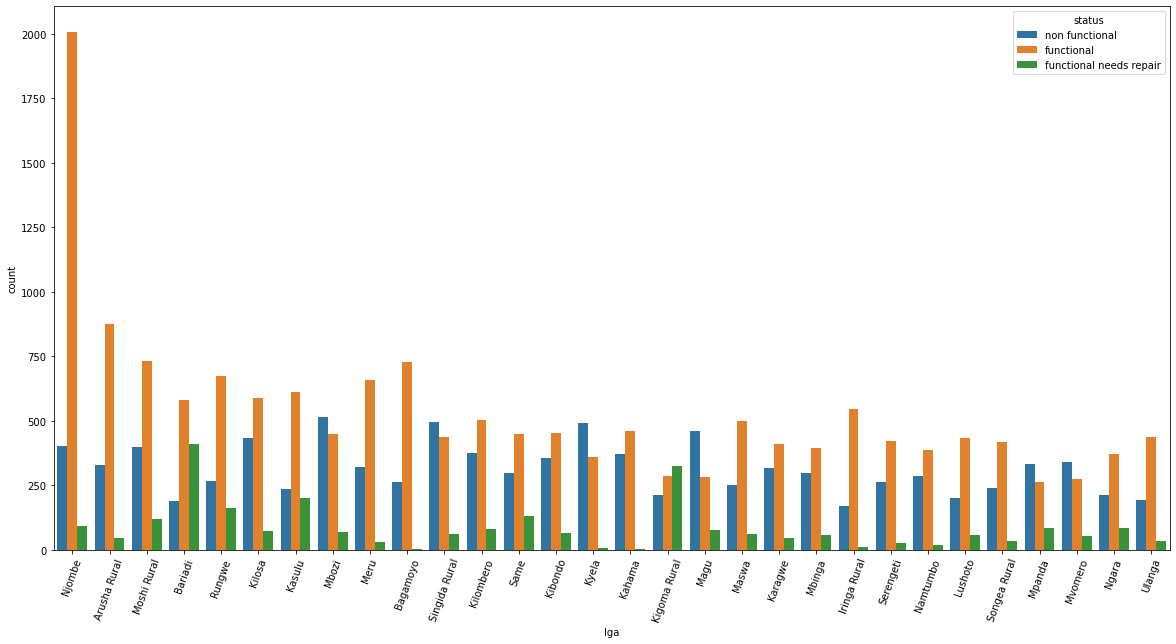

In [18]:
lga_cols = list(lga_series.iloc[:30].index) # check first 30 categories
lga_cols.pop(0)
lga_df = pump.loc[pump['lga']== 'Njombe']
for col in lga_cols:
    temp_df = pump.loc[pump['lga'] == col]
    lga_df = pd.concat([lga_df, temp_df])
    
fig = plt.figure(figsize = (20,10))
ax = sns.countplot(data = lga_df, x = 'lga', hue = 'status')
ax.set_xticklabels(ax.get_xticklabels(),rotation=70)
plt.show()

## scheme_name & scheme_management

In [19]:
pump['scheme_name'].value_counts().head(30)

missing                                  28166
K                                          682
None                                       644
Borehole                                   546
Chalinze wate                              405
M                                          400
DANIDA                                     379
Government                                 320
Ngana water supplied scheme                270
wanging'ombe water supply s                261
wanging'ombe supply scheme                 234
I                                          229
Bagamoyo wate                              229
Uroki-Bomang'ombe water sup                209
N                                          204
Kirua kahe gravity water supply trust      193
Machumba estate pipe line                  185
Makwale water supplied sche                166
Kijiji                                     161
S                                          154
Handeni Trunk Main(H                       152
mtwango water

In [20]:
pump['scheme_management'].value_counts()

VWC                 36793
WUG                  5206
missing              3877
Water authority      3153
WUA                  2883
Water Board          2748
Parastatal           1680
Private operator     1063
Company              1061
Other                 766
SWC                    97
Trust                  72
None                    1
Name: scheme_management, dtype: int64

scheme_management and scheme_name both are supposed to describe who operates the waterpoint but scheme management has significantly fewer missing values for some reason.

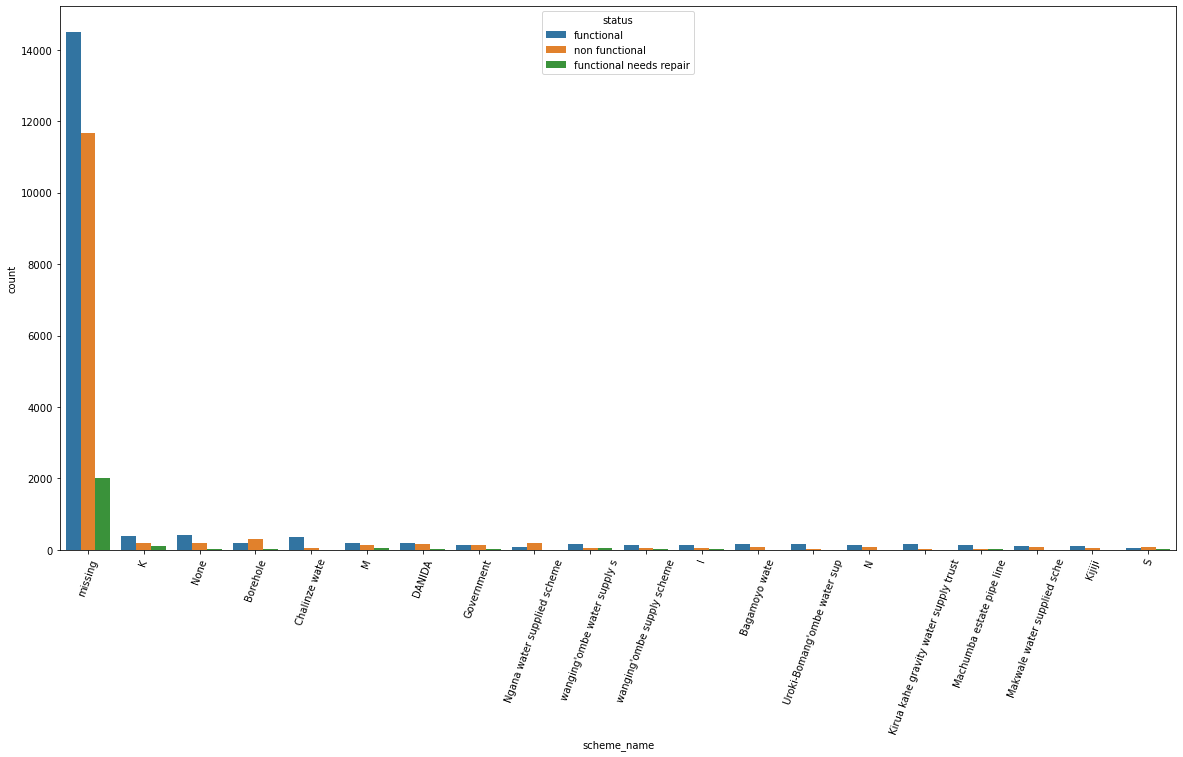

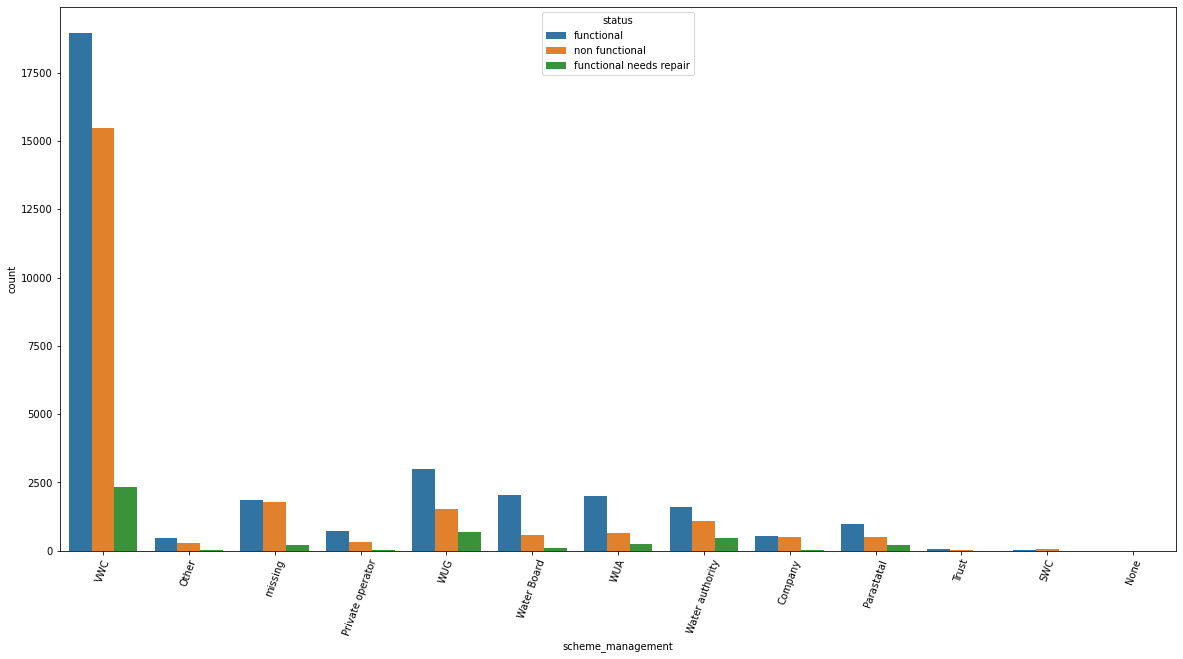

In [21]:
scheme_name_series = pump['scheme_name'].value_counts()
scheme_management_series = pump['scheme_management'].value_counts()

scheme_name_cols = list(scheme_name_series.iloc[:20].index) # check first 20 categories
scheme_name_cols.pop(0)
scheme_name_df = pump.loc[pump['scheme_name']== 'missing']
for col in scheme_name_cols:
    temp_df = pump.loc[pump['scheme_name'] == col]
    scheme_name_df = pd.concat([scheme_name_df, temp_df])
    
fig = plt.figure(figsize = (20,10))
ax = sns.countplot(data = scheme_name_df, x = 'scheme_name', hue = 'status')
ax.set_xticklabels(ax.get_xticklabels(),rotation=70)
plt.show()

fig = plt.figure(figsize = (20,10))
ax = sns.countplot(data = pump, x = 'scheme_management', hue = 'status')
ax.set_xticklabels(ax.get_xticklabels(),rotation=70)
plt.show()

Neither appear to be that useful. scheme_management has less unique values so we'll drop scheme_name

In [22]:
pump.describe()

,id,amount_tsh,gps_height,longitude,latitude,num_private,region_code,district_code,population,construction_year
count,59400.000000,59400.000000,59400.000000,59400.000000,5.940000e+04,59400.000000,59400.000000,59400.000000,59400.000000,59400.000000
mean,37115.131768,317.650385,668.297239,34.077427,-5.706033e+00,0.474141,15.297003,5.629747,179.909983,1300.652475
std,21453.128371,2997.574558,693.116350,6.567432,2.946019e+00,12.236230,17.587406,9.633649,471.482176,951.620547
min,0.000000,0.000000,-90.000000,0.000000,-1.164944e+01,0.000000,1.000000,0.000000,0.000000,0.000000
25%,18519.750000,0.000000,0.000000,33.090347,-8.540621e+00,0.000000,5.000000,2.000000,0.000000,0.000000
50%,37061.500000,0.000000,369.000000,34.908743,-5.021597e+00,0.000000,12.000000,3.000000,25.000000,1986.000000
75%,55656.500000,20.000000,1319.250000,37.178387,-3.326156e+00,0.000000,17.000000,5.000000,215.000000,2004.000000
max,74247.000000,350000.000000,2770.000000,40.345193,-2.000000e-08,1776.000000,99.000000,80.000000,30500.000000,2013.000000


## amount_tsh

In [23]:
pump['amount_tsh'].value_counts()

0.0         41639
500.0        3102
50.0         2472
1000.0       1488
20.0         1463
            ...  
8500.0          1
6300.0          1
220.0           1
138000.0        1
12.0            1
Name: amount_tsh, Length: 98, dtype: int64

In [24]:
tsh_df = pump[['amount_tsh','status']]
tsh_df.head()

,amount_tsh,status
0,6000.0,functional
1,0.0,functional
2,25.0,functional
3,0.0,non functional
4,0.0,functional


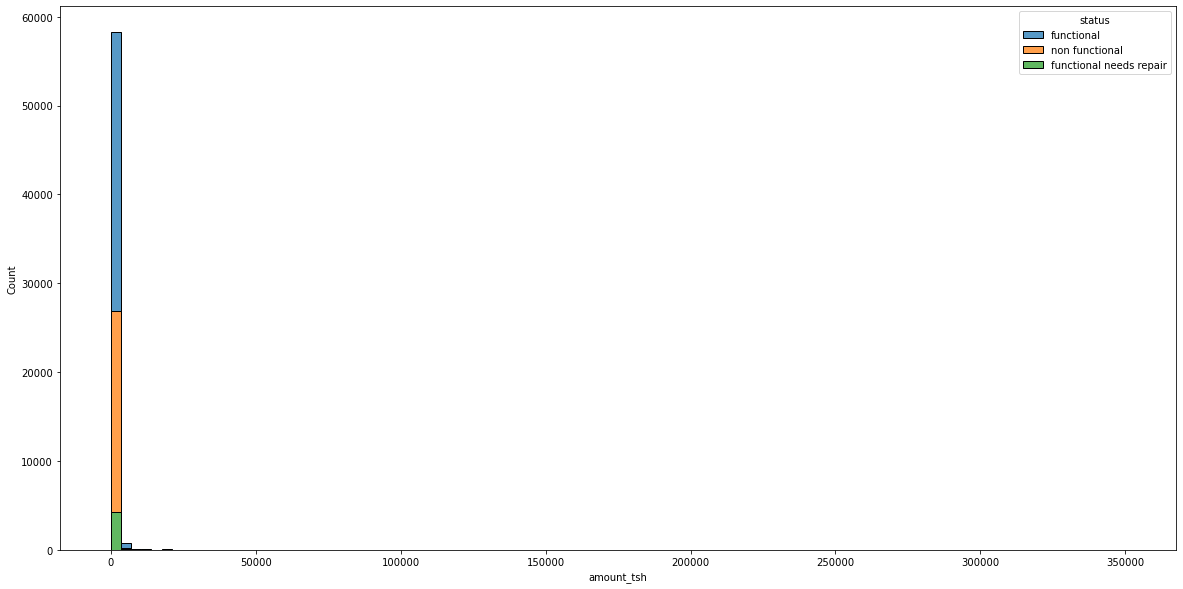

In [25]:
fig, ax = plt.subplots(figsize = (20,10))
sns.histplot(data = pump, x = 'amount_tsh', hue = 'status', multiple = 'stack', bins = 100, ax = ax)
plt.show()

In [26]:
tsh_df.groupby('status').mean()

,amount_tsh
status,
functional,461.798235
functional needs repair,267.071577
non functional,123.481230


In [27]:
tsh_df.groupby('status').std()

,amount_tsh
status,
functional,3889.735284
functional needs repair,1925.026420
non functional,1110.120571


While the plots didn't appear to help us all that much, from the summary statistics, it looks like pumps with lower amount_tsh values are less likely to be functional. That being said, the standard deviations and the mean are probably significantly affected by our outliers. We probably will throw these into smaller bins.

In [28]:
tsh_df.groupby('amount_tsh').count()

,status
amount_tsh,
0.00,41639
0.20,3
0.25,1
1.00,3
2.00,13
...,...
138000.00,1
170000.00,1
200000.00,1


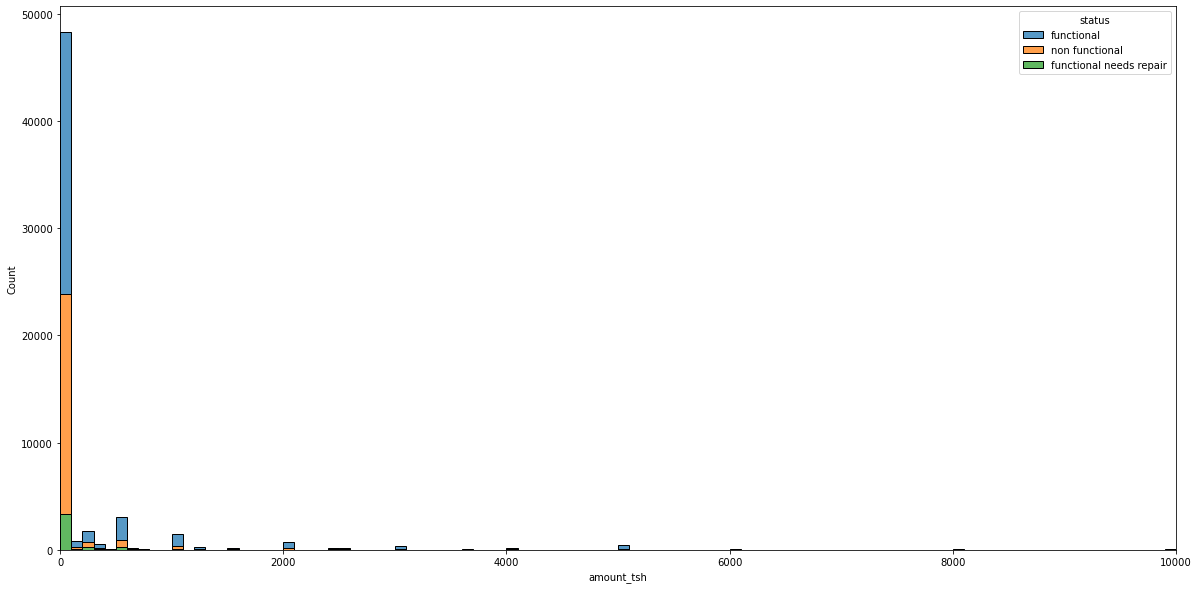

In [29]:
fig, ax = plt.subplots(figsize = (20,10))
sns.histplot(data = pump, x = 'amount_tsh', hue = 'status', multiple = 'stack', bins = np.arange(0, 10001, 100), ax = ax)
plt.xlim(0, 10000)
plt.show()

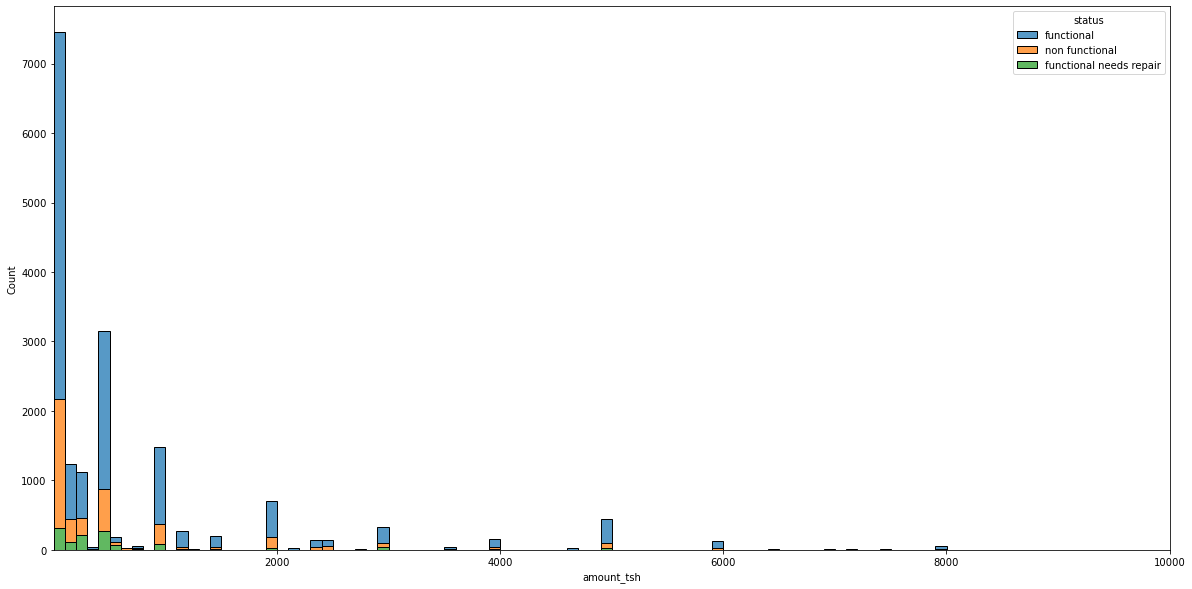

In [30]:
fig, ax = plt.subplots(figsize = (20,10))
sns.histplot(data = pump, x = 'amount_tsh', hue = 'status', multiple = 'stack', bins = np.arange(1, 10001, 100), ax = ax)
plt.xlim(1, 10000)
plt.show()

## num_private

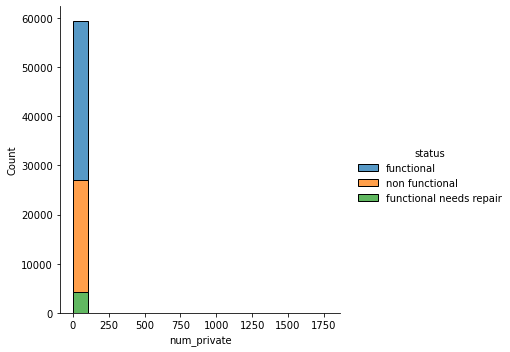

In [31]:
sns.displot(data = pump, x = 'num_private', hue = 'status', multiple = 'stack')

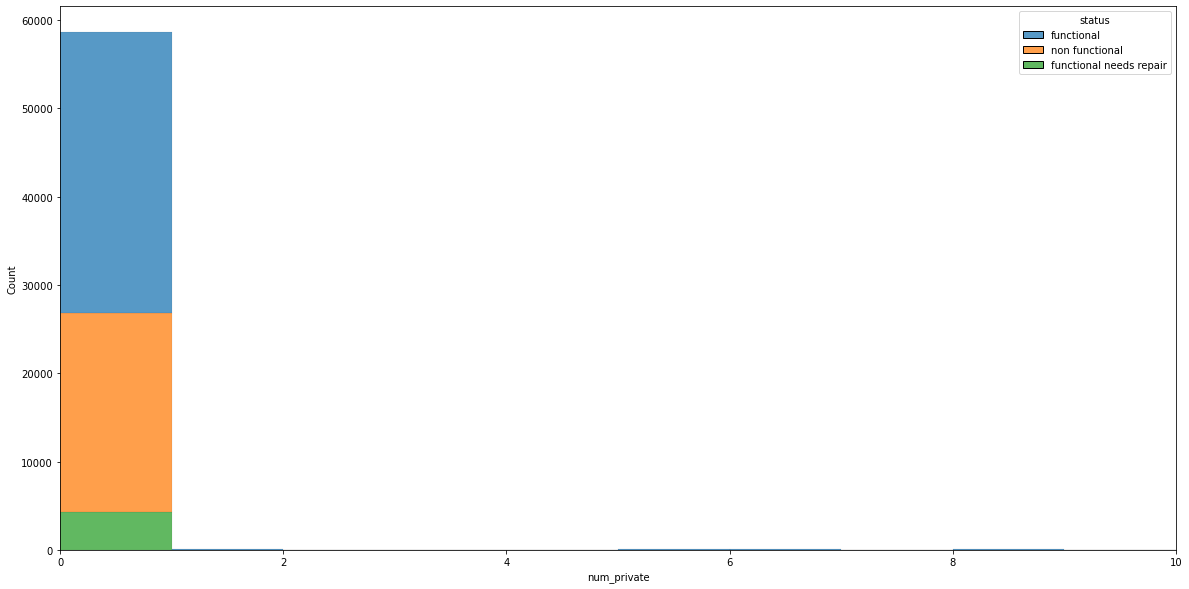

In [32]:
fig = plt.figure(figsize = (20,10))
ax = sns.histplot(data = pump, x = 'num_private', binwidth = 1, hue = 'status', multiple = 'stack')
plt.xlim(0,10)
plt.show()

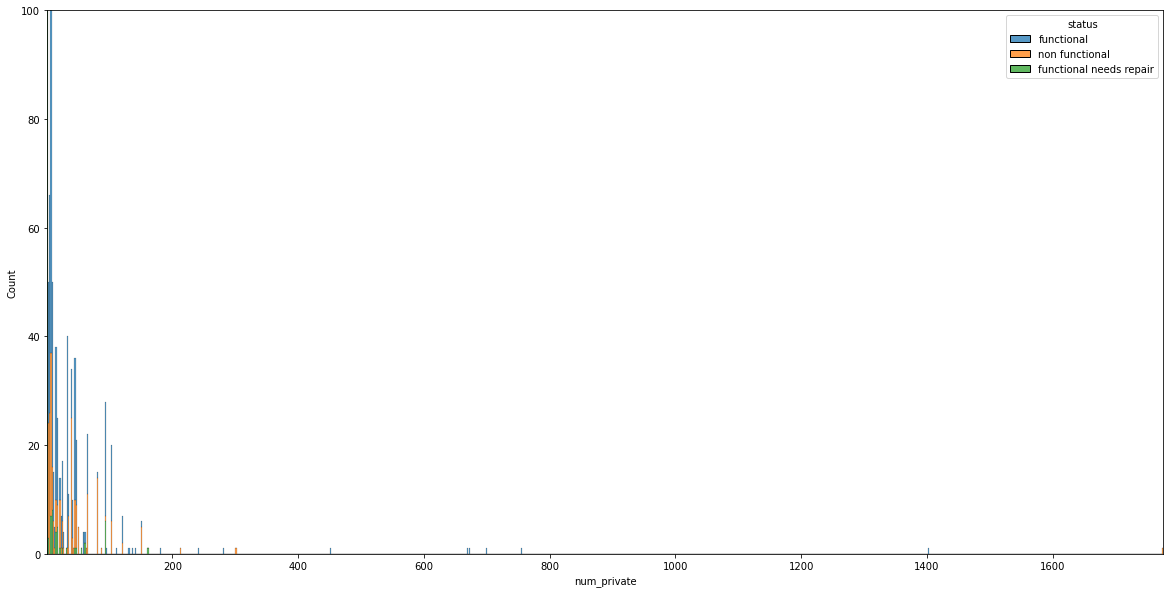

In [33]:
fig = plt.figure(figsize = (20,10))
ax = sns.histplot(data = pump, x = 'num_private', binwidth = 2, hue = 'status', multiple = 'stack')
plt.xlim(1,1776)
plt.ylim(0, 100)
plt.show()

In [34]:
num_private_df = pump[['num_private', 'status']]
num_private_df.groupby('status').mean()

,num_private
status,
functional,0.539012
functional needs repair,0.307621
non functional,0.413950


In [35]:
num_private_df.groupby('num_private').count()

,status
num_private,
0,58643
1,73
2,23
3,27
4,20
...,...
672,1
698,1
755,1


## Subvillage

In [36]:
pump['subvillage'].value_counts()

Madukani                 508
Shuleni                  506
Majengo                  502
Kati                     373
missing                  371
                        ... 
Nyeri                      1
Esmiti                     1
Mbigiligi Mnadani          1
Kundikili Magharibi B      1
Ughilau                    1
Name: subvillage, Length: 19288, dtype: int64

In [37]:
subvillage_series = pump['subvillage'].value_counts()
subvillage_series.head(50)

Madukani                508
Shuleni                 506
Majengo                 502
Kati                    373
missing                 371
Mtakuja                 262
Sokoni                  232
M                       187
Muungano                172
Mbuyuni                 164
Mlimani                 152
Songambele              147
Msikitini               134
Miembeni                134
1                       132
Kibaoni                 114
Kanisani                111
Mapinduzi               109
I                       109
Mjimwema                108
Mjini                   108
Mkwajuni                104
Mwenge                  102
Mabatini                 98
Azimio                   98
Mission                  95
Mbugani                  95
Bwawani                  91
Bondeni                  90
Chang'Ombe               88
Zahanati                 86
Kichangani               84
Senta                    84
Mtaa Wa Kitunda Kati     84
Misufini                 83
Center              

In [38]:
subvillage_cols = list(subvillage_series.iloc[:50].index)
subvillage_cols.pop(0)
subvillage_df = pump.loc[pump['subvillage']== 'Madukani']
for col in subvillage_cols:
    temp_df = pump.loc[pump['subvillage'] == col]
    subvillage_df = pd.concat([subvillage_df, temp_df])

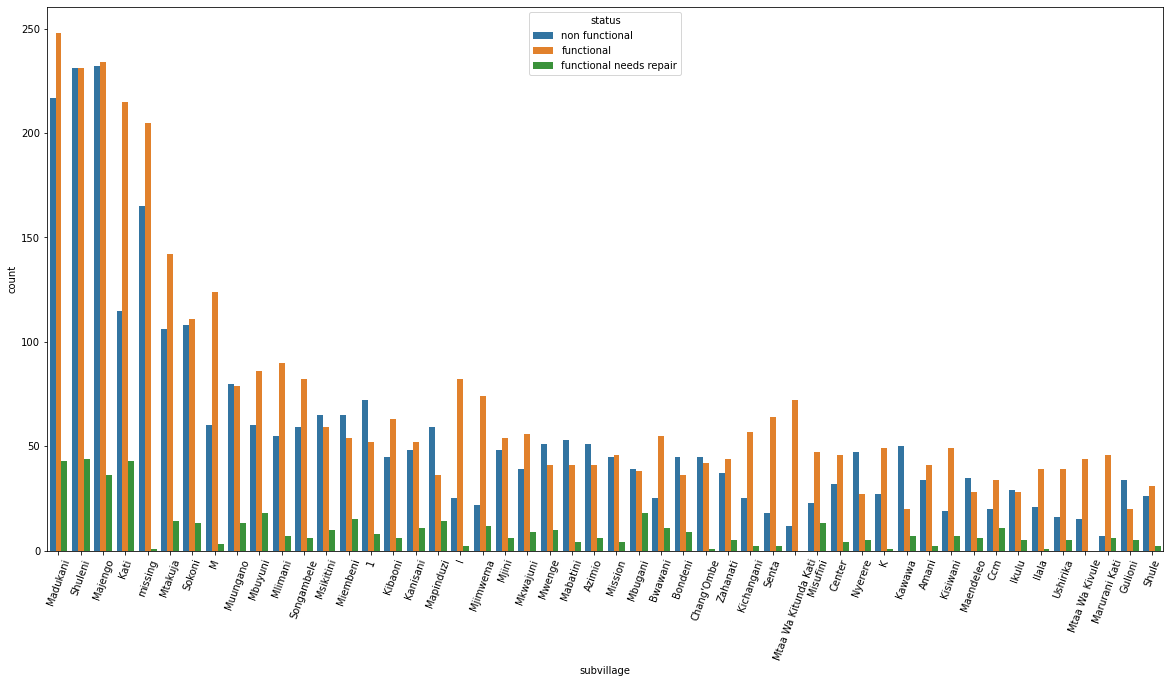

In [39]:
fig = plt.figure(figsize = (20,10))
ax = sns.countplot(data = subvillage_df, x = 'subvillage', hue = 'status')
ax.set_xticklabels(ax.get_xticklabels(),rotation=70)
plt.show()

<AxesSubplot:xlabel='permit', ylabel='count'>

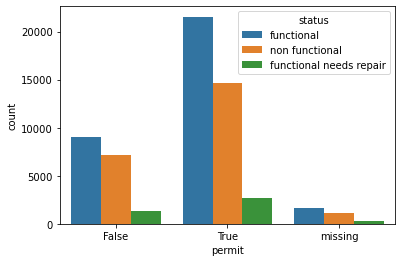

In [40]:
sns.countplot(data = pump, x='permit', hue = 'status')

In [42]:
pump.loc[pump.longitude <= 5, 'longitude'] = np.nan # using 5 for safety
pump.loc[pump.latitude >= -0.5, 'latitude'] = np.nan # use -0.5 since some of the values aren't 0 but very close to 0
pump.loc[pump.gps_height <= 0, 'gps_height'] = np.nan
pump.loc[pump.population <= 0, 'population'] = np.nan
pump.loc[pump.construction_year <= 1900, 'construction_year'] = np.nan

In [43]:
pump['year_recorded'] = pd.DatetimeIndex(pump['date_recorded']).year
pump['month_recorded'] = pd.DatetimeIndex(pump['date_recorded']).month

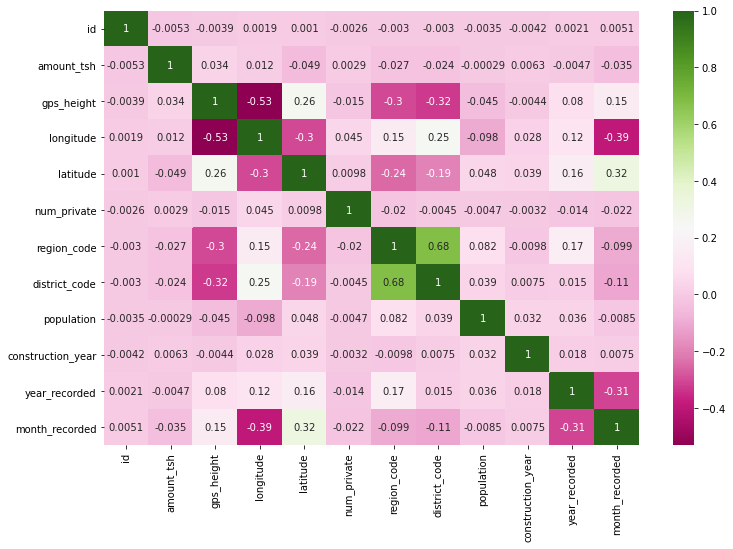

In [44]:
plt.figure(figsize=(12,8))
sns.heatmap(pump.corr(), annot=True, cmap = 'PiYG')
plt.show()

In [53]:
ward_series = pump['ward'].value_counts()
ward_series.head(50)

Igosi               307
Imalinyi            252
Siha Kati           232
Mdandu              231
Nduruma             217
Mishamo             203
Kitunda             203
Msindo              201
Chalinze            196
Maji ya Chai        190
Usuka               187
Ngarenanyuki        172
Chanika             171
Vikindu             162
Mtwango             153
Matola              145
Zinga/Ikerege       141
Wanging'ombe        139
Maramba             139
Itete               137
Magomeni            135
Kikatiti            134
Ifakara             134
Olkokola            133
Maposeni            130
Mvomero             129
Igongolo            129
Mlangali            125
Nkoma               122
Nkungulu            121
Mahongole           121
Rujewa              120
Simbo               118
Masama Magharibi    116
Kiranyi             115
Mamire              115
Lupalilo            114
Kidatu              114
Kagongo             113
Ihanda              113
Hedaru              112
Chinamili       

In [54]:
ward_cols = list(ward_series.iloc[:50].index)
ward_cols.pop(0)
ward_df = pump.loc[pump['ward'] == 'Igosi']
for col in ward_cols:
    temp_df = pump.loc[pump['ward'] == col]
    ward_df = pd.concat([ward_df, temp_df])

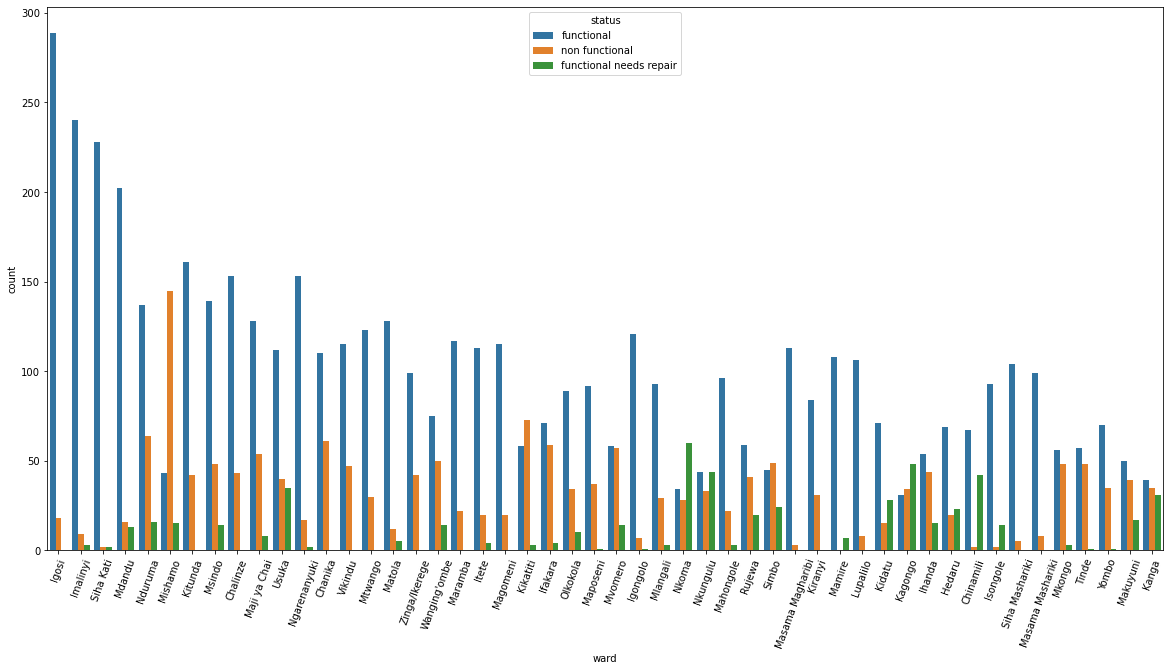

In [55]:
fig = plt.figure(figsize = (20,10))
ax = sns.countplot(data = ward_df, x = 'ward', hue = 'status')
ax.set_xticklabels(ax.get_xticklabels(),rotation=70)
plt.show()